In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

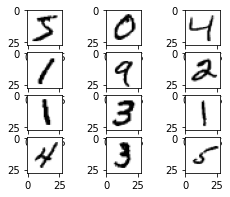

In [3]:
plt.figure(figsize = (4,3))
for i in range(12):
    plt.subplot(4, 3, i+1)
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)
plt.show()

In [4]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#Keras modelimizi oluşturalım
input_shape = (28, 28, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

In [8]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

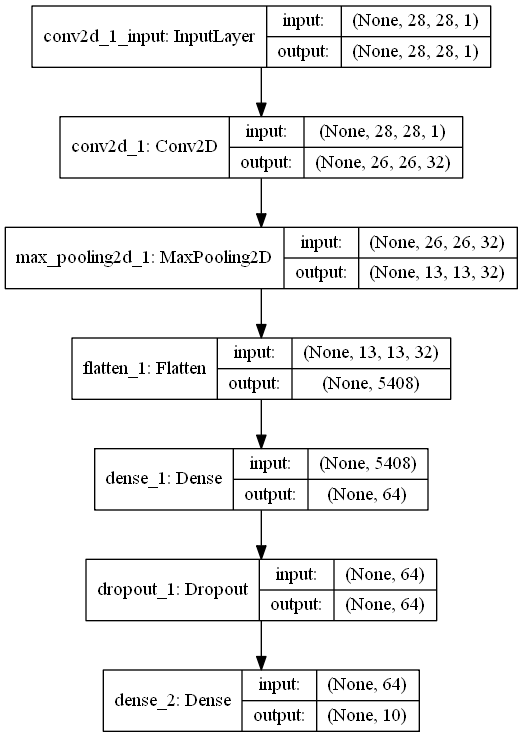

In [9]:
tf.keras.utils.plot_model(model, "aigroup7-mnist.png",show_shapes = True, show_layer_names = True)

In [10]:
history = model.fit(
     X_train,
     y_train,
     verbose = 2,
     epochs = 5,
     batch_size = 16,
     validation_split = 0.2
)


Train on 48000 samples, validate on 12000 samples
Epoch 1/5
 - 38s - loss: 0.3362 - accuracy: 0.8971 - val_loss: 0.1164 - val_accuracy: 0.9657
Epoch 2/5
 - 36s - loss: 0.1712 - accuracy: 0.9486 - val_loss: 0.0846 - val_accuracy: 0.9767
Epoch 3/5
 - 36s - loss: 0.1311 - accuracy: 0.9594 - val_loss: 0.0820 - val_accuracy: 0.9757
Epoch 4/5
 - 36s - loss: 0.1124 - accuracy: 0.9646 - val_loss: 0.0703 - val_accuracy: 0.9797
Epoch 5/5
 - 37s - loss: 0.1010 - accuracy: 0.9680 - val_loss: 0.0729 - val_accuracy: 0.9802


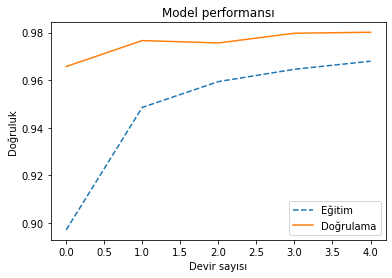

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], '--')
plt.plot(history.history["val_accuracy"])
plt.title("Model performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'lower right')
plt.show()

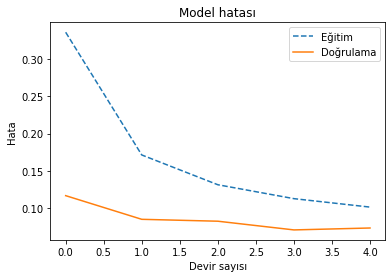

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], '--')
plt.plot(history.history["val_loss"])
plt.title("Model hatası")
plt.ylabel("Hata")
plt.xlabel("Devir sayısı")
plt.legend(["Eğitim", "Doğrulama"], loc = 'upper right')
plt.show()

In [13]:
performans = model.evaluate(X_test, y_test, verbose = 0)

print("Modelin test performansı: %.2f%%" % (performans[1]*100))

Modelin test performansı: 98.00%


In [14]:
#Recurrent Neural Networks

In [15]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN
from keras.preprocessing import sequence

In [16]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [17]:
print(X_train.shape)

(25000,)


In [18]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)

print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [19]:
X_train.shape

(25000, 500)

In [20]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(SimpleRNN(64))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


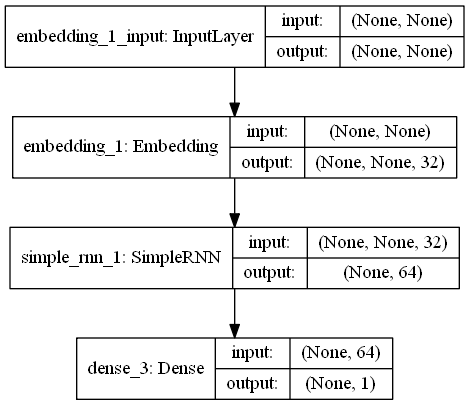

In [21]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "AIGroup7_SimpleRNN.png", show_shapes = True, show_layer_names = True)

In [22]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 26s 1ms/step - loss: 0.6784 - accuracy: 0.5827 - val_loss: 0.6891 - val_accuracy: 0.5260
Epoch 2/10
20000/20000 [==============================] - 30s 1ms/step - loss: 0.5187 - accuracy: 0.7622 - val_loss: 0.4089 - val_accuracy: 0.8190
Epoch 3/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.3605 - accuracy: 0.8508 - val_loss: 0.3803 - val_accuracy: 0.8352
Epoch 4/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.2904 - accuracy: 0.8837 - val_loss: 0.3954 - val_accuracy: 0.8264
Epoch 5/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2668 - accuracy: 0.8956 - val_loss: 0.3604 - val_accuracy: 0.8432
Epoch 6/10
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2095 - accuracy: 0.9209 - val_loss: 0.3640 - val_accuracy: 0.8438
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/ste

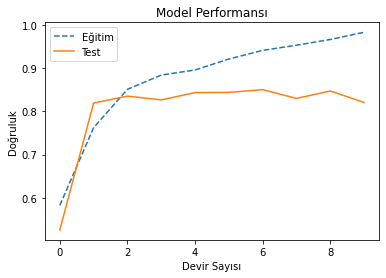

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

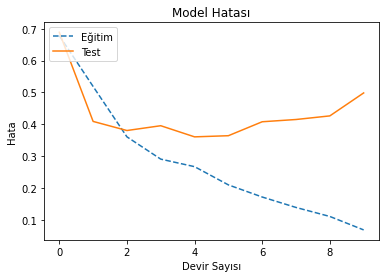

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

In [25]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin doğruluğu: %.2f%%" % (performans[1]*100)) 

Modelin doğruluğu: 82.50%


In [26]:
#Long Short Term Memory

In [28]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding, LSTM
from keras.preprocessing import sequence

In [29]:
num_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = num_words)
print(X_train)
print(X_train.shape)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [30]:
maxlen = 500
X_train = sequence.pad_sequences(X_train, maxlen = maxlen)
X_test = sequence.pad_sequences(X_test, maxlen = maxlen)

print("Eğitim kümesinin son hali: \n", X_train)

Eğitim kümesinin son hali: 
 [[   0    0    0 ...   19  178   32]
 [   0    0    0 ...   16  145   95]
 [   0    0    0 ...    7  129  113]
 ...
 [   0    0    0 ...    4 3586    2]
 [   0    0    0 ...   12    9   23]
 [   0    0    0 ...  204  131    9]]


In [31]:
print("Eğitim kümesinin boyutları", X_train.shape)

Eğitim kümesinin boyutları (25000, 500)


In [32]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(num_words, embedding_vector_length))
model.add(LSTM(64))
model.add(Dense(1, activation = "sigmoid"))

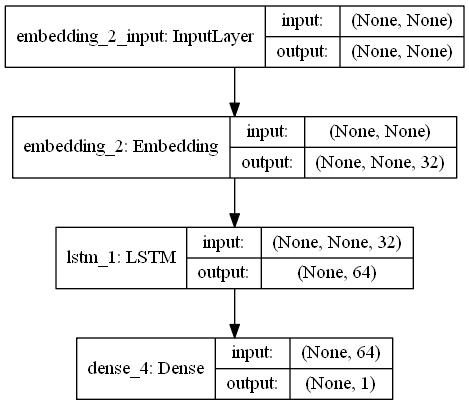

In [33]:
import tensorflow as tf
tf.keras.utils.plot_model(model, "RNN-LSTM.png", show_shapes = True, show_layer_names = True)

In [34]:
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [35]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                24832     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 184,897
Trainable params: 184,897
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 512,
    validation_split = 0.2
)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 142s 7ms/step - loss: 0.6704 - accuracy: 0.6061 - val_loss: 0.6361 - val_accuracy: 0.6696
Epoch 2/10
20000/20000 [==============================] - 137s 7ms/step - loss: 0.5420 - accuracy: 0.7715 - val_loss: 0.3991 - val_accuracy: 0.8376
Epoch 3/10
20000/20000 [==============================] - 141s 7ms/step - loss: 0.3198 - accuracy: 0.8716 - val_loss: 0.3476 - val_accuracy: 0.8488
Epoch 4/10
20000/20000 [==============================] - 163s 8ms/step - loss: 0.2526 - accuracy: 0.9028 - val_loss: 0.3011 - val_accuracy: 0.8798
Epoch 5/10
20000/20000 [==============================] - 177s 9ms/step - loss: 0.2102 - accuracy: 0.9234 - val_loss: 0.2888 - val_accuracy: 0.8780
Epoch 6/10
20000/20000 [==============================] - 177s 9ms/step - loss: 0.1887 - accuracy: 0.9319 - val_loss: 0.2941 - val_accuracy: 0.8810
Epoch 7/10
20000/20000 [==============================] - 178s 

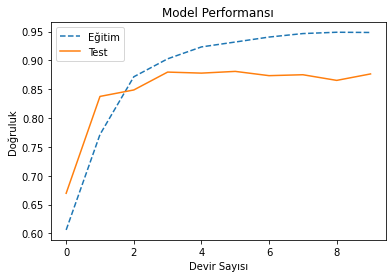

In [37]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"], "--")
plt.plot(history.history["val_accuracy"])
plt.title("Model Performansı")
plt.ylabel("Doğruluk")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

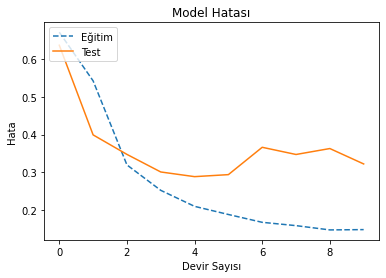

In [38]:
plt.plot(history.history["loss"], "--")
plt.plot(history.history["val_loss"])
plt.title("Model Hatası")
plt.ylabel("Hata")
plt.xlabel("Devir Sayısı")
plt.legend(["Eğitim", "Test"], loc = "upper left")
plt.show()

In [39]:
performans = model.evaluate(X_test, y_test, verbose = 0)
print("Modelin doğruluğu: %.2f%%" % (performans[1]*100)) 

Modelin doğruluğu: 87.03%
